In [1]:
# Homework 3: Module 3 - SPARCS Analysis
# Name: Kamran Butt
# Date: 10/10/2024
# Version: 1.0

In [16]:
## 1. Setup Github Repository - Completed on Github

## 2. Loading the Data
import pandas as pd
import time

# Do not display exponential notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

start_time = time.time()
df = pd.read_csv('/content/drive/MyDrive/HHA 507/Homework 3/sparcs_2022.csv')
end_time = time.time()
load_time = end_time - start_time
print (f"Time to load data: {load_time} seconds")

<ipython-input-16-c7e28edc7943>:11: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/HHA 507/Homework 3/sparcs_2022.csv')


Time to load data: 17.282354593276978 seconds


In [17]:
# Remove all white space, lower case, replace space with underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('-','_')

# Remove commas from total_charges and total_costs
df.total_charges = df.total_charges.apply(lambda x : x.replace (',',''))
df.total_costs = df.total_costs.apply(lambda x : x.replace (',',''))

# Convert 'total_charges' and 'total_costs' to numeric, coercing errors to NaN
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['total_costs'] = pd.to_numeric(df['total_costs'], errors='coerce')


In [18]:
# Reference for column names
df.columns

Index(['hospital_service_area', 'hospital_county',
       'operating_certificate_number', 'permanent_facility_id',
       'facility_name', 'age_group', 'zip_code___3_digits', 'gender', 'race',
       'ethnicity', 'length_of_stay', 'type_of_admission',
       'patient_disposition', 'discharge_year', 'ccsr_diagnosis_code',
       'ccsr_diagnosis_description', 'ccsr_procedure_code',
       'ccsr_procedure_description', 'apr_drg_code', 'apr_drg_description',
       'apr_mdc_code', 'apr_mdc_description', 'apr_severity_of_illness_code',
       'apr_severity_of_illness_description', 'apr_risk_of_mortality',
       'apr_medical_surgical_description', 'payment_typology_1',
       'payment_typology_2', 'payment_typology_3', 'birth_weight',
       'emergency_department_indicator', 'total_charges', 'total_costs'],
      dtype='object')

In [19]:
# Display the first 10 rows to verify the data is loaded correctly

df.head(10)

,hospital_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code___3_digits,gender,race,ethnicity,...,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,emergency_department_indicator,total_charges,total_costs
0,New York City,Bronx,7000006.000,3058.000,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,107,F,White,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,51514.620,7552.540
1,New York City,Bronx,7000006.000,3058.000,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,M,Black/African American,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,25370.860,3469.550
2,New York City,Bronx,7000006.000,3058.000,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Medicaid,NaN,NaN,NaN,N,23876.780,6180.330
3,New York City,Bronx,7000006.000,3058.000,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,100,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,43319.050,12588.930
4,New York City,Bronx,7000006.000,1168.000,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,M,Other Race,Spanish/Hispanic,...,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,40266.230,10355.990
5,New York City,Bronx,7000006.000,1169.000,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,113,M,Other Race,Not Span/Hispanic,...,Major,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,39204.840,10234.280
6,New York City,Bronx,7000006.000,1169.000,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,125,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Medicare,NaN,NaN,NaN,Y,35047.400,5460.520
7,New York City,Bronx,7000006.000,1169.000,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Black/African American,Not Span/Hispanic,...,Minor,Moderate,Medical,Medicare,NaN,NaN,NaN,Y,28221.110,4685.050
8,New York City,Bronx,7000006.000,1169.000,Montefiore Medical Center - Henry & Lucy Moses...,0 to 17,104,F,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,29619.890,7355.070
9,New York City,Bronx,7000006.000,3058.000,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,104,M,Black/African American,Not Span/Hispanic,...,Minor,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,29193.280,3960.280


In [20]:
# Only keep Suffolk and Nassau counties

df_suffolk_nassau = df[(df.hospital_county =='Suffolk') | (df.hospital_county == 'Nassau')]

suffolk = df_suffolk_nassau[df_suffolk_nassau.hospital_county == 'Suffolk']
nassau = df_suffolk_nassau [df_suffolk_nassau.hospital_county == 'Nassau']

## Test loaded records
##len(suffolk)
##len(nassau)

In [28]:
## 3. Basic Descriptive Statsitcs

# length_of_stay

desc_suffolk = suffolk['length_of_stay'].describe()
print("Suffolk:")
display(desc_suffolk)


desc_nassau = nassau['length_of_stay'].describe()
print("Nassau:")
display(desc_nassau)

Suffolk:


,length_of_stay
count,157340
unique,118
top,2
freq,35634


Nassau:


,length_of_stay
count,183939
unique,118
top,1
freq,38646


In [27]:
# total_charges

desc_suffolk = suffolk['total_charges'].describe()
print("Suffolk:")
display(desc_suffolk)


desc_nassau = nassau['total_charges'].describe()
print("Nassau:")
display(desc_nassau)

Suffolk:


,total_charges
count,157340.000
mean,79660.187
std,109447.965
min,350.000
25%,29335.000
50%,50287.265
75%,91124.962
max,5759466.070


Nassau:


,total_charges
count,183939.000
mean,104124.921
std,155920.804
min,9.170
25%,33526.760
50%,60633.500
75%,116518.620
max,4941247.570


In [29]:
# total_costs

desc_suffolk = suffolk['total_costs'].describe()
print("Suffolk:")
display(desc_suffolk)


desc_nassau = nassau['total_costs'].describe()
print("Nassau:")
display(desc_nassau)

Suffolk:


,total_costs
count,157340.000
mean,20739.105
std,50780.302
min,43.470
25%,6640.455
50%,11657.350
75%,21948.897
max,2266933.660


Nassau:


,total_costs
count,183939.000
mean,21667.775
std,33230.595
min,1.440
25%,7260.405
50%,12682.560
75%,24192.750
max,1312508.740


In [38]:
## 4. Exploring Categorical Variables

# Count distributions - Suffolk
age_group_counts_suffolk = suffolk['age_group'].value_counts()
gender_counts_suffolk = suffolk['gender'].value_counts()
admission_type_counts_suffolk = suffolk['type_of_admission'].value_counts()

print("Age Group (Suffolk):")
display(age_group_counts_suffolk)

print("Gender (Suffolk):")
display(gender_counts_suffolk)

print("Admission Type (Suffolk):")
display(admission_type_counts_suffolk)

Age Group (Suffolk):


,count
age_group,
70 or Older,57373
50 to 69,41613
30 to 49,28170
0 to 17,18829
18 to 29,11355


Gender (Suffolk):


,count
gender,
F,86445
M,70895


Admission Type (Suffolk):


,count
type_of_admission,
Emergency,109923
Elective,22115
Newborn,13971
Urgent,11000
Trauma,260
Not Available,71


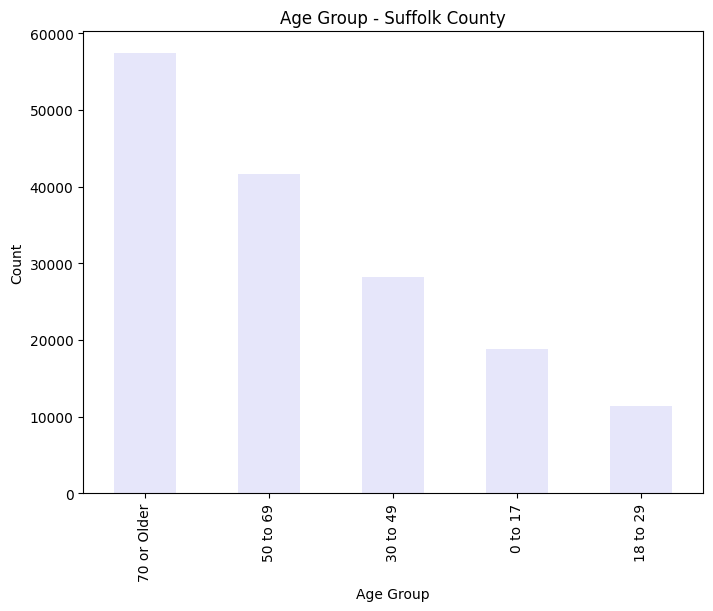

In [42]:
# Bar plot for Age Group - Suffolk with sorted x-axis

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
age_group_counts_suffolk.plot(kind='bar', x='Age Group', y='Count', legend=False, color='lavender')
plt.title('Age Group - Suffolk County')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

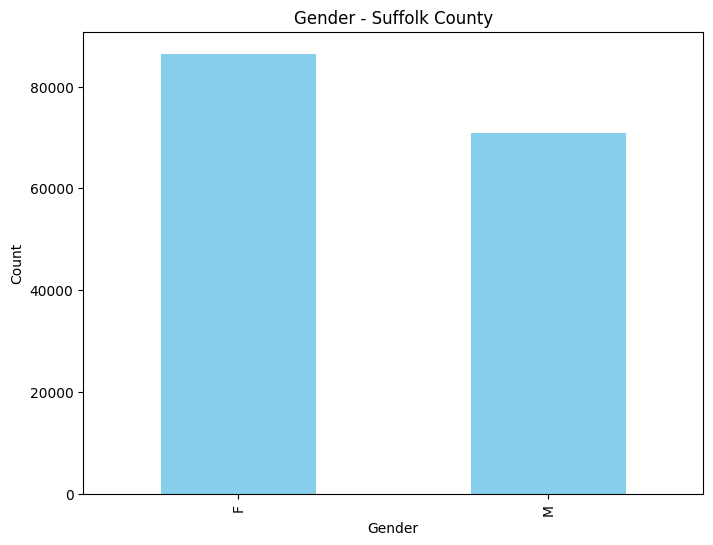

In [43]:
# Bar plot for Gender - Suffolk with sorted x-axis

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
gender_counts_suffolk.plot(kind='bar', x='Age Group', y='Count', legend=False, color='skyblue')
plt.title('Gender - Suffolk County')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [36]:
# Count distributions - Nassau
age_group_counts_nassau = nassau['age_group'].value_counts()
gender_counts_nassau = nassau['gender'].value_counts()
admission_type_counts_nassau = nassau['type_of_admission'].value_counts()

print("Age Group (Nassau):")
display(age_group_counts_nassau)

print("Gender (Nassau):")
display(gender_counts_nassau)

print("Admission Type (Nassau):")
display(admission_type_counts_nassau)

Age Group (Nassau):


,count
age_group,
70 or Older,71574
50 to 69,48817
30 to 49,32469
0 to 17,19373
18 to 29,11706


Gender (Nassau):


,count
gender,
F,100959
M,82978
U,2


Admission Type (Nassau):


,count
type_of_admission,
Emergency,123795
Elective,33117
Newborn,15582
Urgent,9541
Trauma,1827
Not Available,77


In [33]:
# Bar plot for Age Group with sorted x-axis
plt.figure(figsize=(8,6))
age_group_counts_suffolk.plot(kind='bar', x='Age Group', y='Count', legend=False, color='lavender')
plt.title('Age Group Counts')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Display the DataFrame for Gender Distribution
print("Gender Distribution:")
display(gender_df)

# Bar plot for Gender
plt.figure(figsize=(8,6))
gender_df.plot(kind='bar', x='Gender', y='Count', legend=False, color='skyblue')
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Display the DataFrame for Type of Admission Distribution
print("Type of Admission Distribution:")
display(admission_type_df)

# Bar plot for Type of Admission
plt.figure(figsize=(8,6))
admission_type_df.plot(kind='bar', x='Type of Admission', y='Count', legend=False, color='blue')
plt.title('Type of Admission Counts')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.show()


,count
age_group,
70 or Older,57373
50 to 69,41613
30 to 49,28170
0 to 17,18829
18 to 29,11355


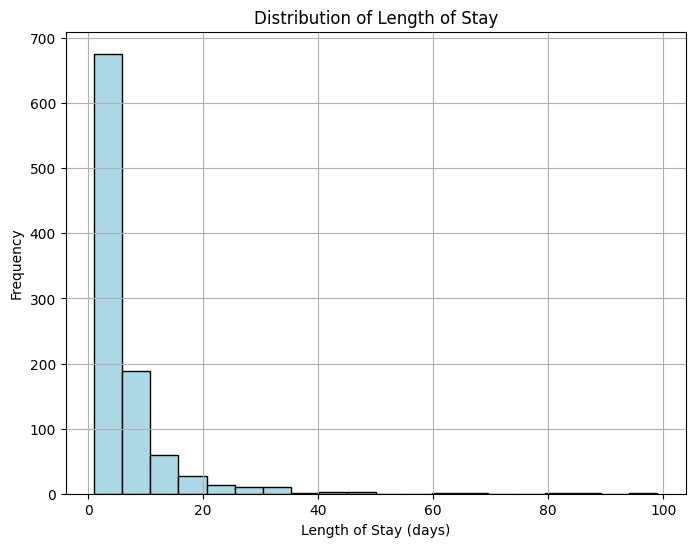

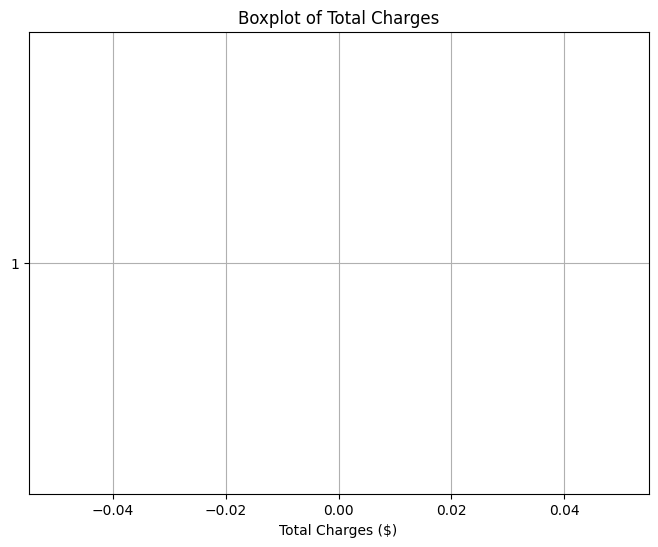

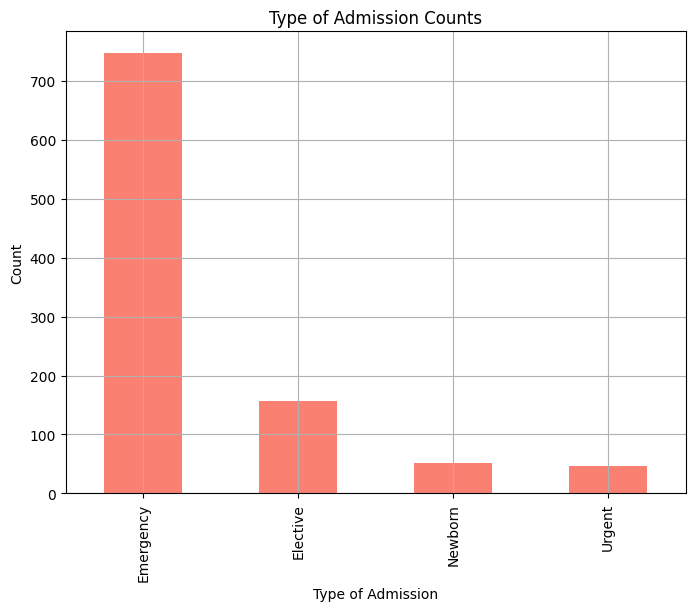

In [ ]:
# Histogram of Length of Stay
plt.figure(figsize=(8,6))
plt.hist(data['length_of_stay'].dropna(), bins=20, edgecolor='black', color='lightblue')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Boxplot for Total Charges to identify outliers
plt.figure(figsize=(8,6))
plt.boxplot(data['total_charges'].dropna(), vert=False)
plt.title('Boxplot of Total Charges')
plt.xlabel('Total Charges ($)')
plt.grid(True)
plt.show()


# Bar plot for Type of Admission to analyze admission trends
plt.figure(figsize=(8,6))
admission_type_counts.plot(kind='bar', x='Type of Admission', y='Count', legend=False, color='salmon')
plt.title('Type of Admission Counts')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
# Check for missing data
missing_data = data.isnull().sum()

# Display missing data
missing_data_df = pd.DataFrame(missing_data, columns=['Missing Values'])
missing_data_df


,Missing Values
hospital_service_area,2
hospital_county,2
operating_certificate_number,2
permanent_facility_id,2
facility_name,0
age_group,0
zip_code_3_digits,35
gender,0
race,0
ethnicity,0


In [ ]:
# Option to drop rows with missing data or fill missing values
# Drop rows with missing data
data_cleaned = data.dropna()

# Display the cleaned data
data_cleaned.head()

,hospital_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_severity_of_illness,apr_risk_of_mortality,apr_medical_surgical,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,emergency_department_indicator,total_charges,total_costs
